In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("emoji_uncleaned.csv")
df.head(5)

,Tweet,Label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2


In [ ]:
!pip install tweet-preprocessor
import preprocessor as p
def preprocess_tweet(row):
    text = row['Tweet']
    text = p.clean(text)
    return text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df['Tweet'] = df.apply(preprocess_tweet, axis=1)
df.head()

,Tweet,Label
0,A little throwback with my favourite person Wa...,0
1,"glam on yesterday for makeup using in ,",7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO Walt Disney Magic Kingdom,0
4,Who never... A Galaxy Far Far Away,2


In [ ]:
df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
df.head()

<ipython-input-6-ab46dfe31e12>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


,Tweet,Label
0,a little throwback with my favourite person wa...,0
1,glam on yesterday for makeup using in,7
2,democracy plaza in the wake of a stunning outc...,11
3,then amp now vilo walt disney magic kingdom,0
4,who never a galaxy far far away,2


In [ ]:
 df.drop_duplicates(inplace=True)
print('after drop duplicates', df.shape)

after drop duplicates (49728, 2)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english')
X = vectorizer.fit_transform(df.Tweet)

In [ ]:
y = df["Label"].values

In [ ]:
from sklearn.model_selection import train_test_split

#X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101, stratify=y,shuffle = True)

In [ ]:
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

Training X Dim  (42268, 33449)
Training y Dim  (42268,)


In [ ]:
from sklearn.svm import SVC
clf = SVC()
#clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)

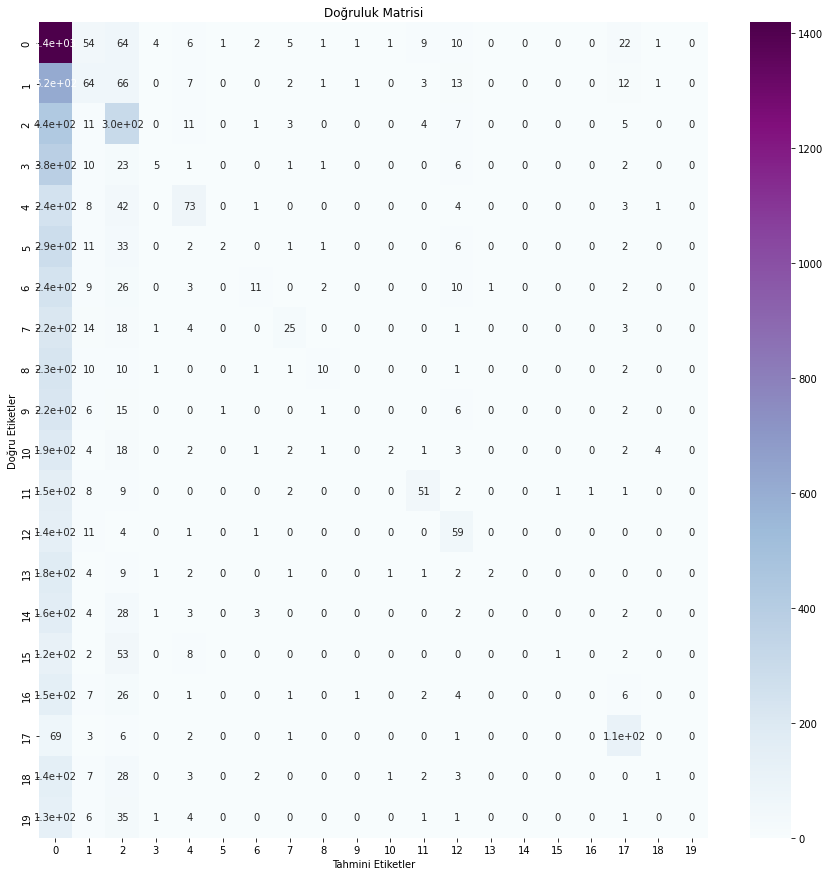

In [ ]:
plt.figure(figsize=(15,15))
result = confusion_matrix(y_test, y_predict_test)
sns.heatmap(result, annot=True,cmap = "BuPu")
plt.ylabel('Doğru Etiketler')
plt.xlabel('Tahmini Etiketler')
plt.title('Doğruluk Matrisi')
plt.savefig('SVM TFIDF & NORMAL.png', bbox_inches='tight')
plt.show()

In [ ]:
import itertools


def plot_confusion_matrix(cm, classes, normalize=True,title='Doğrulama Tablosu',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Doğrulama Tablosu')
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Doğru Etiketler')
    plt.xlabel('Tahmin Etiketleri')
    plt.tight_layout()

Normalized confusion matrix


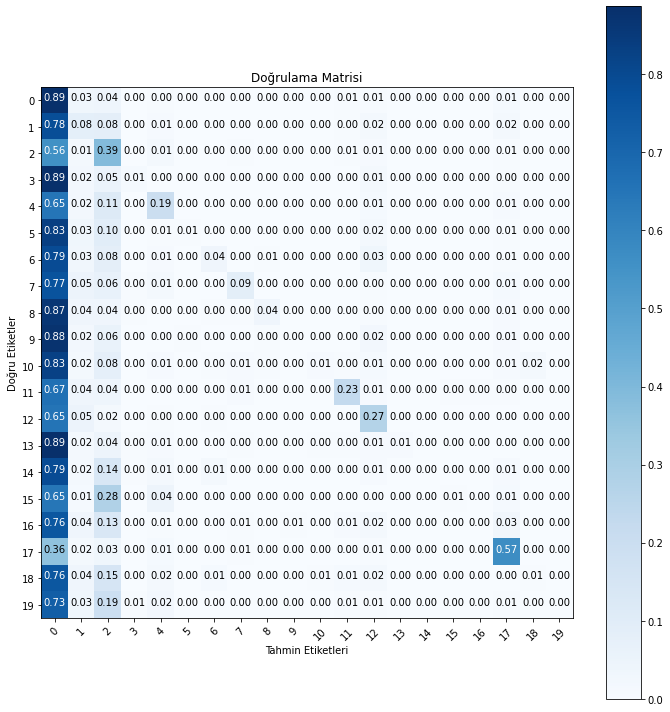

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

plot_confusion_matrix(cm, [i for i in range(20)] ,title='Doğrulama Matrisi', normalize=True)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

#predict_x = model.predict(X_test)
#classes_x=np.argmax(predict_x,axis=1)
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.25      0.89      0.39      1600
           1       0.25      0.08      0.12       788
           2       0.37      0.39      0.38       784
           3       0.36      0.01      0.02       432
           4       0.55      0.19      0.29       376
           5       0.50      0.01      0.01       346
           6       0.48      0.04      0.07       306
           7       0.56      0.09      0.15       282
           8       0.56      0.04      0.07       268
           9       0.00      0.00      0.00       249
          10       0.40      0.01      0.02       231
          11       0.69      0.23      0.34       225
          12       0.42      0.27      0.33       218
          13       0.67      0.01      0.02       202
          14       0.00      0.00      0.00       206
          15       0.50      0.01      0.01       187
          16       0.00      0.00      0.00       196
          17       0.61    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
